## Exploring Weather Trends - Project Instructions

**Summary**

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

**Instructions**

Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

- **Extract the data** from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the `city_list` table. To interact with the database, you'll need to write a SQL query.
    - Write a SQL query to extract the city level data. Export to CSV.
    - Write a SQL query to extract the global data. Export to CSV.

- **Open up the CSV** in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.
- **Create a line chart** that compares your city’s temperatures with the global temperatures. Make sure to plot the _moving average_ rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).
- **Make observations** about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

**Submission**

Your submission should be a PDF that includes:

- **An outline** of steps taken to prepare the data to be visualized in the chart, such as:
    - What tools did you use for each step? (Python, SQL, Excel, etc)
    - How did you calculate the moving average?
    - What were your key considerations when deciding how to visualize the trends?
- **Line chart** with local and global temperature trends
- At least **four observations** about the similarities and/or differences in the trends

### 1. Extract the data

In [1]:
### SQL Statements to get the required data ###

# SELECT
#         city_data.city AS "City Name",
#         city_data.year AS "Year", 
#         city_data.avg_temp AS "City Avgerage Temp.", 
#         global_data.avg_temp AS "Global Average Temp." 
#     FROM 
#         city_data 
#     JOIN 
#         global_data 
#     ON 
#         city_data.year = global_data.year 
#     WHERE 
#         city_data.city='Seattle'

### 2. Open up the CSV

In [3]:
# Load in the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create filepaths
local_path = %pwd
global_data = local_path + '/data/raw_data/results_global.csv'
local_data = local_path + '/data/raw_data/results_local.csv'
# read in csvs into a dataframe
global_df = pd.read_csv(global_data, parse_dates = ['year'], index_col = ['year'])
local_df = pd.read_csv(local_data, parse_dates = ['year'], index_col = ['year'])
# global dataframe
global_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   avg_temp  266 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [4]:
# local dataframe
local_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 1828-01-01 to 2013-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      186 non-null    object 
 1   avg_temp  183 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


### 3. Create a line chart

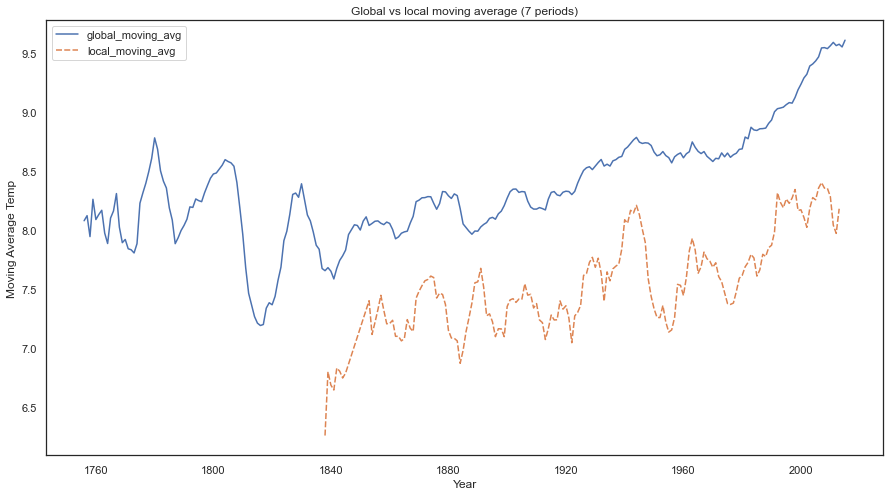

In [4]:
# create a moving average for each dataframe based on a rolling 7 period window
global_df['global_moving_avg'] = global_df.avg_temp.rolling(window=7).mean()
local_df['local_moving_avg'] = local_df.avg_temp.rolling(window=7).mean()

# create a clean dataframe to graph from by copying from global_df
df = pd.DataFrame.copy(global_df)
# drop unnecessary columns
df = df.drop(['avg_temp'], axis=1)
# combine global moving average with local by concatinating along index of year
df = pd.concat([df, local_df['local_moving_avg']], axis=1)

# create line chart using seaborn
sns.set(style="white", rc={'figure.figsize':(15,8)})
ax = sns.lineplot(data=df)
ax.set(xlabel = "Year", ylabel = "Moving Average Temp")
ax.set_title("Global vs local moving average (7 periods)");

### 4. Make Observations

**Is your city hotter or cooler on average compared to the global average?**

In [5]:
global_avg = global_df['global_moving_avg'].mean()
local_avg = local_df['local_moving_avg'].mean()
answer = (
    f"My local city of Seattle is cooler with an average of {local_avg:.2f} "
    f"compared to the global average of {global_avg:.2f}.")
print(answer)

My local city of Seattle is cooler with an average of 7.53 compared to the global average of 8.36.


**Has the difference been consistent over time?**

Below you can see the difference over time between the global and local moving average i.e. Seattle. You can also see a slight rising trend from the mean difference of 0.97 starting after 1940.

*graph starts at approximately year 1840 as Seattle did not start to collect data till 1838-01-01


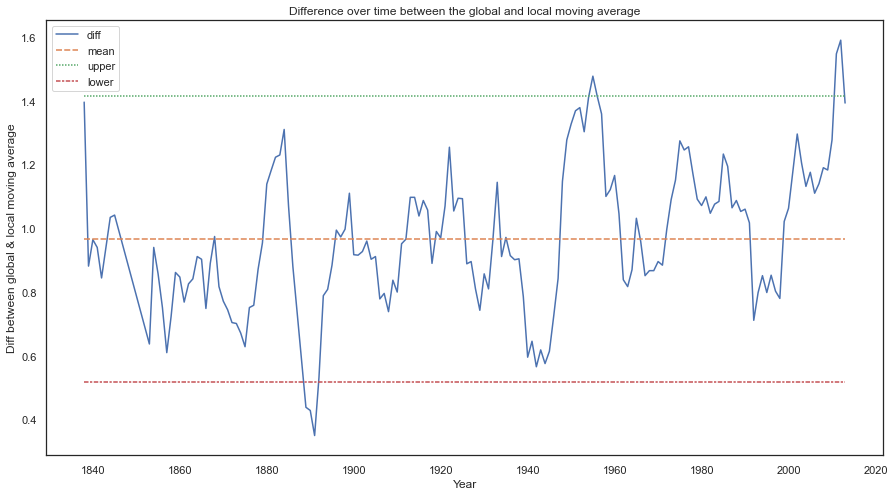

In [6]:
results = pd.DataFrame() # create a new df for the results
results['diff'] = global_df['global_moving_avg'] - local_df['local_moving_avg'] # create the global to local difference
results = results.dropna() # drop NaNs
results['mean'] = results['diff'].mean() # mean of difference between global - local
results['upper'] = results['mean'] + (results['diff'].std() * 2) # upper bound of variance
results['lower'] = results['mean'] - (results['diff'].std() * 2) # lower bound of variance
ax = sns.lineplot(data=results);
ax.set(xlabel = "Year", ylabel = "Diff between global & local moving average")
ax.set_title("Difference over time between the global and local moving average");
answer = (
    f"Below you can see the difference over time between the global and local moving average i.e. Seattle. "
    f"You can also see a slight rising trend from the mean difference of {results['mean'][0]:.2f} starting after 1940.\n\n"
    f"*graph starts at approximately year 1840 as Seattle did not start to collect data till 1838-01-01")
print(answer)

**How do the changes in your city’s temperatures over time compare to the changes in the global average?**

Below is the year-over-year difference in the global compared to the local moving average i.e. Seattle.
You can see more year over year volatility in the local moving average compared to global.

*graph starts at approximately year 1840 as Seattle did not start to collect data till 1838-01-01


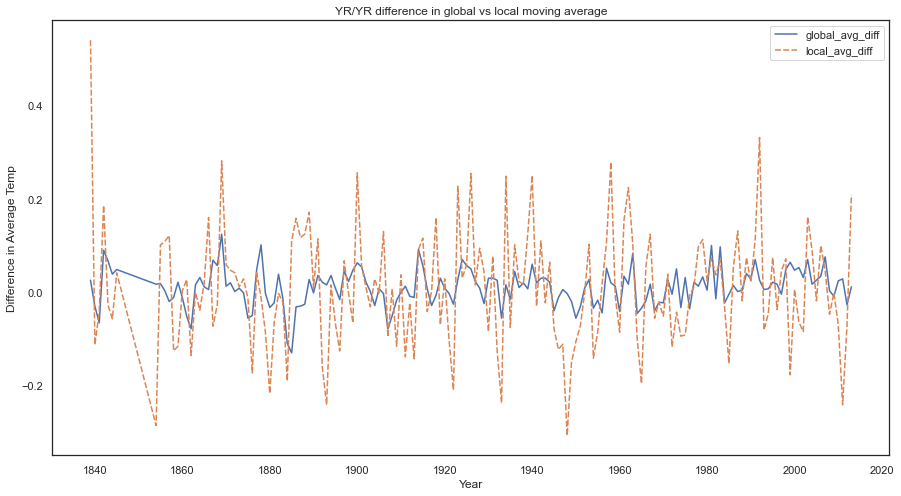

In [7]:
# local year over year difference compared to global year over year difference
results1 = pd.DataFrame() # create a new df for the results
results1['global_avg_diff'] = global_df.global_moving_avg.diff()
results1['local_avg_diff'] = local_df.local_moving_avg.diff()
results1 = results1.dropna() # drop NaNs
ax = sns.lineplot(data=results1);
ax.set(xlabel = "Year" , ylabel = "Difference in Average Temp")
ax.set_title("YR/YR difference in global vs local moving average")
answer = (
    f"Below is the year-over-year difference in the global compared to the local moving average i.e. Seattle.\n"
    f"You can see more year over year volatility in the local moving average compared to global.\n\n"
    f"*graph starts at approximately year 1840 as Seattle did not start to collect data till 1838-01-01")
print(answer)

Additionally, both the global and local average have been increasing over time.
Yet it appears the global average is increasing faster than local.



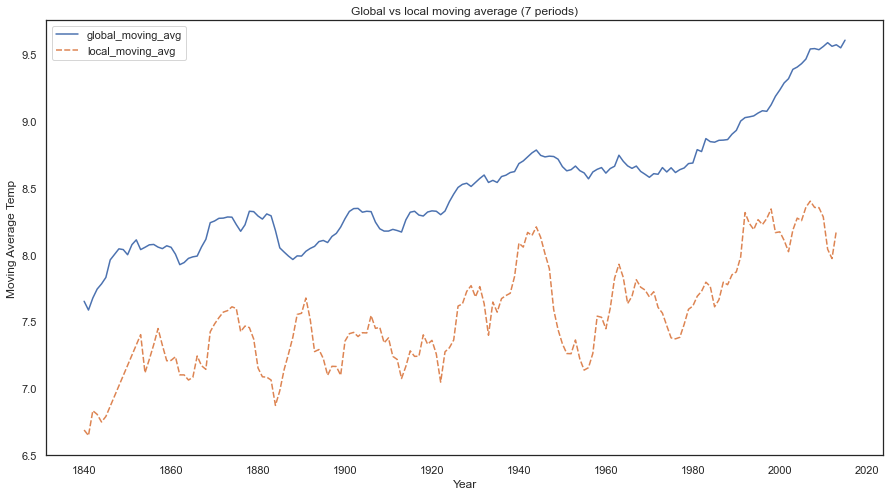

In [8]:
ax = sns.lineplot(data=df['1840':]);
ax.set(xlabel="Year", ylabel="Moving Average Temp")
ax.set_title("Global vs local moving average (7 periods)")
answer = (
    f"Additionally, both the global and local average have been increasing over time.\n"
    f"Yet it appears the global average is increasing faster than local.\n"
    )
print(answer)

**What does the overall trend look like?**

The overall trend for both global and local is increasing.



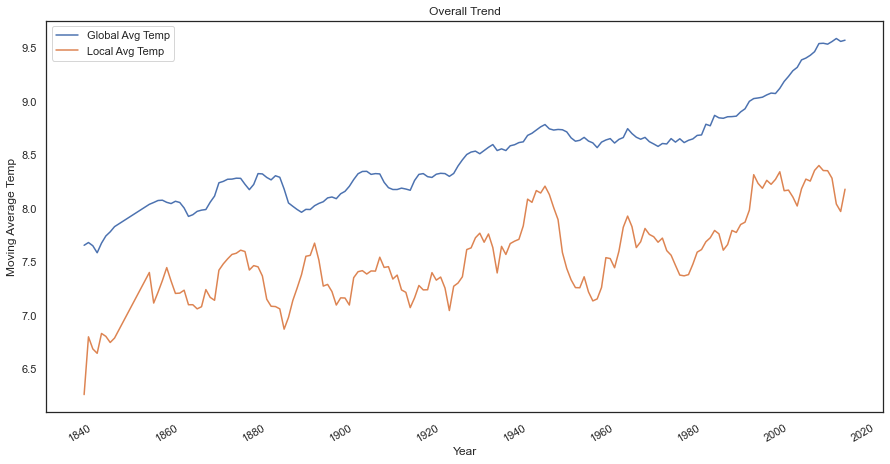

In [9]:
df1 = pd.DataFrame()
df1['Global Avg Temp'],df1['Local Avg Temp']  = global_df.avg_temp.rolling(window=7).mean(), local_df.avg_temp.rolling(window=7).mean()
ax = df1.dropna().plot();
ax.set(xlabel="Year", ylabel="Moving Average Temp")
ax.set_title("Overall Trend")
answer = (
    f"The overall trend for both global and local is increasing.\n"
    )
print(answer)

**Is the world getting hotter or cooler?**

In [10]:
answer = (
    f"It appears that the world is getting hotter."
    )
print(answer)

It appears that the world is getting hotter.


**Has the trend been consistent over the last few hundred years?**

Yes, it appears to be consistently getting hotter over the last 200 years.


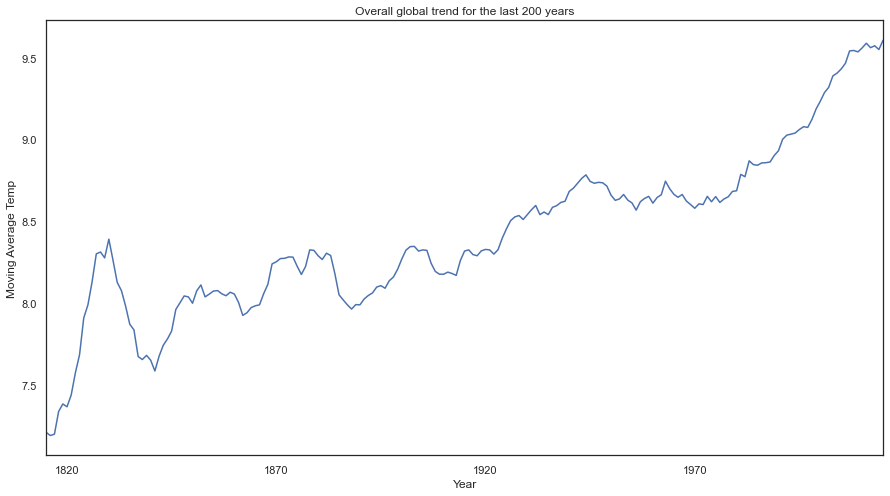

In [11]:
ax = df1['Global Avg Temp'][str(df1.index.max().year-200):].plot();
ax.set(xlabel="Year", ylabel="Moving Average Temp")
ax.set_title("Overall global trend for the last 200 years")
answer = (
    f"Yes, it appears to be consistently getting hotter over the last 200 years."
    )
print(answer)